## Answer the question

### Can you come up out 3 sceneraies which use AI methods?
Advertising recommanded、Automatic drive、simultaneous interpretation

### How do we use Github; Why do we use Jupyter and Pycharm？
We use github to share our coding and ideas to with other viewers in Internet.Also, it is convenient for our teaching assistant to check our homework.We use jupyter notebook to show the code execution effect and Pycharm is not good for this.But Pycharm is designed for software exploitation and we need it when the number of coding is large or the coding is in enormous resource consumption.

### What's the Probability Model
Probabilistic models (generating models) describe the combined probabilities of X and Y or conditional probability distributions such as P (X | Y) through function F.


### Can you came up with some sceneraies at which we could use Probability Model
Spam filtering、NLP(language translate)、Option and Futures pricing

### Why do we use probability and what's the difficult points for programming based on parsing and pattern match？
Because natural language has so many kinds of grammars and sentence patterns that any exports can not list all of them.Besides, when the input sentence pattern change,the programming based on parsing and pattern match are easy to fail.And scientist find it more easier to deal with NLP
problems by using probability model.

### What's the Language Model?
Statistical language model：

A language model is usually constructed as the probability distribution of string s P (s). P (s) actually reflects the probability that s appears as a sentence.
The probability is that the combination of strings appears in the training corpus regardless of whether the sentence is grammatically correct or not. If the training material comes from a human language, then the probability is whether a sentence is human or not.

### Can you came up with some sceneraies at which we could use Language Model?
Speech recognition, machine translation, syntactic analysis

### What's the 1-gram language model?
### the statistical language model:
### p(s) = p(w1,w2,...wT) = p(w1)p(w2|w1)p(w3|w1w2)........p(wT|w1.....wT-1)

Because the volume of calculations will be too large if we use the formula above.

We must introduce an asumption that the probability of a random word appearing is only related to the limited number of n words appearing in front of it.

When n equals to one.This is 1-gram language model.

### p(s) = p(w1,w2,...wT) = p(w1)p(w2|w1)p(w3|w2)........p(wT|wT-1)

### What's the disadvantages and advantages of 1-gram language model?
### Advantages:

The volume of calculations is small and most of the scene it work.

### Disadvantages:

Let' us give a case to show the disadvantages.
p('we eat breakfast in the morning'） and p（'we eat dinner in the morning'）

It is easy to find that the breakfast and the morning has an relation.But 1-gram language model can't find a better sentence between 'we eat breakfast in the morning' and 'we eat dinner in the morning' because of the conditional independence hypothesis.

### What't the 2-gram models?
We introduce an asumption that the probability of a random word appearing is only related to the limited number of 2 words appearing in front of it.

### p(s) = p(w1,w2,...wT) = p(w1)p(w2|w1)p(w3|w2w1)p(w4|w3w2)........p(wT|wT-1wT-2)

## A simple grammer

In [296]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [297]:
another_grammar = """
# 
"""

In [298]:
import random

def adj():
    return random.choice('蓝色的,好看的,小小的'.split(',')).split()[0]

In [299]:
def adj_star():
    return random.choice([lambda : '',lambda : adj()+adj_star()])()

In [300]:
adj()

'小小的'

In [301]:
adj_star()

'好看的'

## But we can find that if we change the grammer ,everything must be rewritten.

In [302]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [303]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
#         print(exp)
#         print(line.split(split))
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [304]:
#貌似老师这里删掉了创建语法
grammar=create_grammar(adj_grammar)

In [305]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [306]:
#减少冗余代码
choice = random.choice
'''
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""
'''

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expand = [generate(gram, t) for t in choice(gram[target])] #
#     print(expand)
    return ''.join([e if e!='/n'else '\n' for e in expand if e!='null'])

In [307]:
example_grammar = create_grammar(simple_grammar)

In [308]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [309]:
generate(gram=example_grammar, target='sentence')

'一个蓝色的女人坐在这个篮球'

In [310]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [311]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='),target='host'))

您好我是8号,您需要打牌吗？
你好我是71号,请问你要赌博吗？
你好我是2号,请问你要打猎吗？
先生,你好我是3号,您需要赌博吗？
先生,你好我是5号,您需要赌博吗？
女士,你好我是3号,您需要打牌吗？
先生,你好我是2号,请问你要赌博吗？
女士,你好我是91号,您需要喝酒吗？
你好我是8号,请问你要赌博吗？
先生,您好我是3979号,请问你要打牌吗？
先生,您好我是5号,您需要赌博吗？
您好我是6号,请问你要喝酒吗？
你好我是6号,您需要喝酒吗？
女士,你好我是1号,您需要喝酒吗？
小朋友,你好我是7号,您需要打猎吗？
小朋友,您好我是98号,您需要打猎吗？
你好我是6号,请问你要赌博吗？
先生,你好我是44号,请问你要喝酒吗？
你好我是7号,您需要打猎吗？
你好我是9号,请问你要打牌吗？


## 作业部分
## 设想两个场景，使用自己定义的语法，使用句子生成器生成句子

In [328]:
#一个学生的语言可以定义为
student = '''
student = 个人 时间 举动 影响
个人 = 学民 | 小红 | 李华 | 学霸 | 学渣
时间 = 通宵 | 清晨 | 全日 | 十年如一日 
举动 = 玩王者荣耀 | 学习 | 准备考研 | 出去浪 | 往死里学 | LOL排位
影响 = 走上人生巅峰 | 成为了博士后 | 变成了咸鱼 | 成为了李哥
'''

#判断程序员资深程度，纯属调侃，请勿当真
coding_man = '''
coding_man =  动作 观察 判定 程序员 结论
动作 = 仔细观察此人
观察 = 发量 手指
手指 =  手指修长 |  手不像打过代码
发量 = 发量浓密 | 发量稀疏 | 发量适中
判定 = 确定是
程序员 = 新手程序员 | 中级程序员 | 资深程序员
结论 = 明天来上班 | 再修炼一年 

'''

In [329]:
for i in range(20):
    print(generate(gram=create_grammar(student, split='='),target='student'))

小红清晨学习变成了咸鱼
学渣通宵出去浪走上人生巅峰
学霸通宵LOL排位成为了博士后
小红十年如一日准备考研变成了咸鱼
学民清晨玩王者荣耀成为了博士后
小红通宵出去浪成为了博士后
学民通宵往死里学成为了博士后
小红十年如一日准备考研成为了博士后
李华通宵出去浪走上人生巅峰
学民全日学习变成了咸鱼
小红清晨往死里学走上人生巅峰
学民清晨准备考研走上人生巅峰
学霸十年如一日LOL排位变成了咸鱼
学渣全日玩王者荣耀成为了博士后
学民十年如一日出去浪走上人生巅峰
学民十年如一日出去浪成为了博士后
学民十年如一日出去浪成为了李哥
学霸清晨往死里学成为了李哥
学渣全日出去浪走上人生巅峰
学霸通宵往死里学成为了李哥


In [330]:
for i in range(20):
    print(generate(gram=create_grammar(coding_man, split='='),target='coding_man'))

仔细观察此人发量浓密手不像打过代码确定是新手程序员再修炼一年
仔细观察此人发量稀疏手指修长确定是中级程序员明天来上班
仔细观察此人发量稀疏手指修长确定是中级程序员明天来上班
仔细观察此人发量稀疏手指修长确定是资深程序员明天来上班
仔细观察此人发量浓密手不像打过代码确定是资深程序员再修炼一年
仔细观察此人发量适中手不像打过代码确定是资深程序员明天来上班
仔细观察此人发量适中手指修长确定是资深程序员再修炼一年
仔细观察此人发量浓密手不像打过代码确定是资深程序员再修炼一年
仔细观察此人发量适中手指修长确定是新手程序员明天来上班
仔细观察此人发量适中手指修长确定是新手程序员明天来上班
仔细观察此人发量稀疏手指修长确定是中级程序员再修炼一年
仔细观察此人发量浓密手不像打过代码确定是资深程序员明天来上班
仔细观察此人发量稀疏手不像打过代码确定是中级程序员明天来上班
仔细观察此人发量稀疏手指修长确定是资深程序员明天来上班
仔细观察此人发量稀疏手不像打过代码确定是资深程序员明天来上班
仔细观察此人发量适中手指修长确定是资深程序员明天来上班
仔细观察此人发量稀疏手指修长确定是中级程序员明天来上班
仔细观察此人发量浓密手不像打过代码确定是中级程序员明天来上班
仔细观察此人发量浓密手指修长确定是资深程序员明天来上班
仔细观察此人发量适中手不像打过代码确定是新手程序员再修炼一年


## 定义 generate_n 生成器

In [409]:
def generate_n(gram, target, n = 1):
        if target not in gram: 
            return target # means target is a terminal expression
        gather=[]
        for i in range(n):
            expand = [generate(gram, t) for t in choice(gram[target])] 
            sentence = ''.join([e if e!='/n'else '\n' for e in expand if e!='null'])
            gather.append(sentence)

        return gather


In [410]:
print(generate_n(gram=create_grammar(coding_man, split='='),target='coding_man',n = 5))

['仔细观察此人发量稀疏手不像打过代码确定是中级程序员再修炼一年', '仔细观察此人发量浓密手不像打过代码确定是资深程序员再修炼一年', '仔细观察此人发量稀疏手指修长确定是资深程序员明天来上班', '仔细观察此人发量适中手不像打过代码确定是中级程序员明天来上班', '仔细观察此人发量浓密手不像打过代码确定是资深程序员明天来上班']


## 定义generate_best生成器,要调用后面的2-gram模型，先运行后面代码

In [413]:
def generate_best(gram,target,n,r): #n生成多少个句子作为选择，r需要多少个得分最高的句子
    gather = generate_n(gram,target,n)
    pro=[]
    for i in gather:
        pro.append(get_probablity(i))
    rank=[]
    for i in zip(gather,pro):
        rank.append(i)
    return sorted(rank,key=lambda x: x[1], reverse=True)[:r]
    

In [416]:
generate_best(gram=create_grammar(student, split='='),target='student',n=50,r=15)

[('学渣通宵学习成为了博士后', 5.477935645788611e-34),
 ('学渣十年如一日学习变成了咸鱼', 5.477935645788611e-34),
 ('学霸清晨往死里学变成了咸鱼', 5.477935645788611e-34),
 ('小红全日往死里学变成了咸鱼', 5.477935645788611e-34),
 ('学民全日学习成为了博士后', 5.477935645788611e-34),
 ('学霸全日往死里学变成了咸鱼', 5.477935645788611e-34),
 ('学渣通宵学习变成了咸鱼', 5.477935645788611e-34),
 ('小红全日往死里学走上人生巅峰', 5.477935645788611e-34),
 ('学渣通宵往死里学成为了博士后', 5.477935645788611e-34),
 ('学民十年如一日学习变成了咸鱼', 5.477935645788611e-34),
 ('学渣清晨往死里学变成了咸鱼', 5.477935645788611e-34),
 ('学渣十年如一日学习变成了咸鱼', 5.477935645788611e-34),
 ('学渣清晨出去浪成为了李哥', 1.2199451676951277e-40),
 ('学民清晨出去浪走上人生巅峰', 1.2199451676951277e-40),
 ('学民全日LOL排位成为了博士后', 1.2199451676951277e-40)]

## Data Driven
我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [101]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [295]:
print(generate(gram=create_grammar(programming, split='=>'), target='stmt'))

namedatabase1=databaseinfo1


## Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$


how to get $ Pr(w1 | w2 w3 w4) $ ?

In [111]:
#马尔科夫链
random.choice(range(100))

82

## 使用豆瓣影评作为数据源

In [1]:
filename=r"D:\NLP研修班\示例代码\datasource\movie_comments.csv"

In [2]:
import pandas as pd
content = pd.read_csv(filename, encoding = 'utf_8')

C:\Users\jack\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [342]:
content.head()


,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [3]:
articles = content['comment'].tolist()
len(articles)

261497

In [4]:
import re
import jieba
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

def cut(string): return list(jieba.cut(string))

In [5]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [6]:
articles_clean[:100]

['吴京意淫到了脑残的地步看了恶心想吐',
 '首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹',
 '吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了煽情而煽情让人觉得他是个大做作大谎言家729更新片子整体不如湄公河行动1整体不够流畅编剧有毒台词尴尬2刻意做作的主旋律煽情显得如此不合时宜而又多余',
 '凭良心说好看到不像战狼1的续集完虐湄公河行动',
 '中二得很',
 '犯我中华者虽远必诛吴京比这句话还要意淫一百倍',
 '脑子是个好东西希望编剧们都能有',
 '三星半实打实的7分第一集在爱国主旋律内部做着各种置换与较劲但第二集才真正显露吴京的野心他终于抛弃李忠志了新增外来班底让硬件实力有机会和国际接轨开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶在理念上它甚至做到绣春刀2最想做到的那部分',
 '开篇长镜头惊险大气引人入胜结合了水平不俗的快剪下实打实的真刀真枪让人不禁热血沸腾特别弹簧床架挡炸弹空手接碎玻璃弹匣割喉等帅得飞起就算前半段铺垫节奏散漫主角光环开太大等也不怕作为一个中国人两个小时弥漫着中国强大得不可侵犯的氛围还是让那颗民族自豪心砰砰砰跳个不停',
 '15100吴京的冷峰在这部里即像成龙又像杰森斯坦森但体制外的同类型电影主角总是代表个人无能的政府需要求助于这些英雄才能解决难题体现的是个人的价值所以主旋律照抄这种模式实际上是有问题的我们以前嘲笑个人英雄主义却没想到捆绑爱国主义的全能战士更加难以下咽',
 '犯我中华者虽远必诛是有多无脑才信这句话',
 '这部戏让人看的热血沸腾对吴京路转粉最后的彩蛋让我们没有理由不期待下一部',
 '假嗨特别恶心的电影',
 '有几处情节设置过于尴尬彰显国家自豪感的部分稍显突兀',
 '就是一部爽片打戏挺燃但是故事一般达康书记不合适这个角色赵东来倒是很合适张瀚太太太违和了分分钟穿越回偶像剧',
 '赵东来达康书记我们接到在非洲卧底的冷锋报告丁义珍现在非洲我们请求抓捕李达康东来这件事先不要声张特别是别让省厅知道就你和我一起去非洲加上冷锋同志三人逮捕丁义珍这次行就叫战狼2吧',
 '下一部拍喜剧吧整个片子真感觉挺搞笑的',
 '战狼2里吴京这么能打他打得过徐晓冬么',
 '

In [7]:
TOKEN = []
for i,line in enumerate(articles_clean):
    if i % 1000 ==0: print(i)
    
    TOKEN += cut(line.strip())
        

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jack\AppData\Local\Temp\jieba.cache


0


Loading model cost 0.951 seconds.
Prefix dict has been built succesfully.


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [10]:
from collections import Counter
words_count = Counter(TOKEN)
# words_count.most_common(100)

## show the change of the most common words' amount

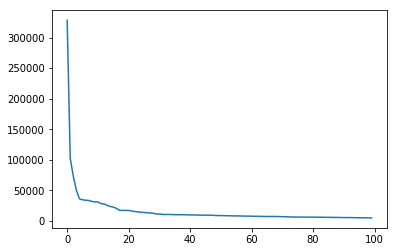

In [11]:
frequiences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(100)]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, frequiences)

## then show the log curve

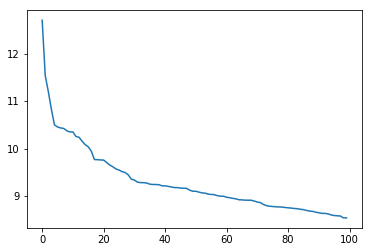

In [12]:
import numpy as np
plt.plot(x, np.log(frequiences))

In [13]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [14]:
prob_1('我们')

0.001308372044443227

In [15]:
TOKEN[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [16]:
TOKEN = [str(t) for t in TOKEN] #为了构造出2gram作准备

In [17]:
'''
n-gram最大的问题就是稀疏问题（Sparsity）。例如，在bi-gram中，若词库中有20k个词，那么两两组合 
就有近2亿个组合。其中的很多组合在语料库中都没有出现，根据极大似然估计得到的组合概率将会是0，从而整个句子的概率就会为0。
最后的结果是，我们的模型只能计算零星的几个句子的概率，而大部分的句子算得的概率是0，这显然是不合理的。
因此，我们要进行数据平滑（data Smoothing），数据平滑的目的有两个：一个是使所有的N-gram概率之和为1，使所有的n-gram概率都不为0。
它的本质，是重新分配整个概率空间，使已经出现过的n-gram的概率降低，补充给未曾出现过的n-gram。

'''
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN))]

In [18]:
TOKEN_2_GRAM[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [19]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [33]:
words_count_2

Counter({'吴京意淫': 3,
         '意淫到': 3,
         '到了': 1120,
         '了脑残': 5,
         '脑残的': 40,
         '的地步': 118,
         '地步看': 3,
         '看了': 4585,
         '了恶心': 16,
         '恶心想': 4,
         '想吐': 99,
         '吐首映礼': 1,
         '首映礼看': 4,
         '看的': 7106,
         '的太': 610,
         '太恐怖': 29,
         '恐怖了': 26,
         '了这个': 478,
         '这个电影': 525,
         '电影不讲道理': 1,
         '不讲道理的': 6,
         '的完全': 118,
         '完全就是': 138,
         '就是吴京': 2,
         '吴京在': 4,
         '在实现': 2,
         '实现他': 2,
         '他这个': 17,
         '这个小': 39,
         '小粉红': 5,
         '粉红的': 1,
         '的英雄': 185,
         '英雄梦': 11,
         '梦各种': 1,
         '各种装备': 1,
         '装备轮番': 1,
         '轮番上场': 4,
         '上场视': 1,
         '视物理': 1,
         '物理逻辑': 1,
         '逻辑于': 1,
         '于不顾': 6,
         '不顾不得不': 1,
         '不得不说': 259,
         '说有钱': 1,
         '有钱真': 6,
         '真好': 482,
         '好随意': 3,
         '随意胡闹': 1,
         '胡闹吴京': 1,
 

In [37]:
def porb_2(word1,word2):
    r = [word1,word2]
    if ''.join(str(i) for i in r) in words_count_2: 
        return words_count_2[''.join(str(i) for i in r)] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [35]:
# def prob_2(word1, word2):
#     if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
#     else:
#         return 1 / len(TOKEN_2_GRAM)

In [38]:
porb_2('小米','手机')

4.454032491721624e-07

In [39]:
porb_2('其余','的')

1.0466976355545816e-05

In [40]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = porb_2(words, next_)
        
        sentence_pro *= probability
        
    return sentence_pro

In [41]:
get_probablity('小明今天抽到一台苹果手机')

5.477935645788611e-34

In [42]:
get_probablity('小明今天抽到一台播音飞机')

5.477935645788611e-34

In [43]:
get_probablity('洋葱奶昔来一杯')

1.1045112800216789e-20

In [44]:
get_probablity('香草奶昔来一杯')

1.1045112800216789e-20

In [45]:
get_probablity('养乐多绿来一杯')

4.959601359327985e-14

In [46]:
get_probablity('adfjeioslsnmfie')

1

In [392]:
for sen in [generate(gram=example_grammar, target='sentence')for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个篮球看着一个篮球 with Prb: 2.4597645643447994e-27
sentence: 这个好看的小猫听着这个小猫 with Prb: 2.716837707516442e-47
sentence: 一个蓝色的篮球看见一个蓝色的好看的小小的小猫 with Prb: 6.682781120024704e-74
sentence: 这个好看的小猫看见一个小小的女人 with Prb: 2.716837707516442e-47
sentence: 一个蓝色的好看的桌子坐在这个篮球 with Prb: 6.050441712006362e-54
sentence: 一个蓝色的女人听着这个小小的小猫 with Prb: 6.050441712006362e-54
sentence: 这个蓝色的篮球看着这个小小的小猫 with Prb: 2.716837707516442e-47
sentence: 这个小小的女人坐在这个蓝色的小猫 with Prb: 2.716837707516442e-47
sentence: 一个蓝色的好看的桌子看见一个好看的篮球 with Prb: 3.000777893940149e-67
sentence: 这个蓝色的好看的小猫看着这个小猫 with Prb: 6.050441712006362e-54


In [393]:

need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 3.000777893940149e-67
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 3.000777893940149e-67
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 5.477935645788611e-34
---- 真是一只好看的小猫 with probility 2.4597645643447994e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.1045112800216789e-20
---- 今晚火锅去吃我 with probility 2.4597645643447994e-27
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.1045112800216789e-20
---- 养乐多绿来一杯 with probility 4.959601359327985e-14
